In [1]:
import pandas as pd
import numpy as np
from glob2 import glob
from sklearn.decomposition import PCA
from scipy.linalg import norm 
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'ticks')
%matplotlib inline
import os 
os.chdir('/Users/gracelyons/Desktop/MSDS/Capstone/')

## Full Regression Testing

In [2]:
nrc = pd.read_csv('output files/nrc_normalized.csv')

In [3]:
nrc.head()

,speaker_id,trust_norm,fear_norm,negative_norm,sadness_norm,anger_norm,surprise_norm,positive_norm,disgust_norm,joy_norm,anticipation_norm,mindfulness,holdout
0,201,0.036965,0.007782,0.027237,0.007782,0.003891,0.011673,0.058366,0.001946,0.033074,0.035019,1,0
1,202,0.031204,0.000000,0.001486,0.000000,0.000000,0.004458,0.047548,0.000000,0.014859,0.019316,0,0
2,203,0.041605,0.002972,0.005944,0.008915,0.001486,0.000000,0.069837,0.001486,0.004458,0.011887,1,1
3,204,0.031895,0.005629,0.011257,0.007505,0.000000,0.007505,0.050657,0.000000,0.018762,0.030019,0,0
4,205,0.029877,0.001757,0.000000,0.000000,0.000000,0.007030,0.057996,0.000000,0.019332,0.017575,1,0


In [4]:
phi = pd.read_csv('output files/phi_lda.csv')

In [5]:
phi.head()

,topic_id,abilities,ability,act,action,activities,activity,add,address,adults,...,worries,worry,writing,yall,yay,yeah,year,years,yep,zone
0,0,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333
1,1,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
2,2,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,2.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333
3,3,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
4,4,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


In [6]:
theta = pd.read_csv('output files/theta_lda.csv')

In [7]:
theta.head()

,speaker_id,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,201,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,0.000463,...,0.000463,0.000463,0.000463,0.000463,0.986574,0.000463,0.000463,0.000463,0.000463,0.000463
1,202,0.000375,0.000375,0.000375,0.000375,0.000375,0.000375,0.000375,0.989139,0.000375,...,0.000375,0.000375,0.000375,0.000375,0.000375,0.000375,0.000375,0.000375,0.000375,0.000375
2,203,0.000337,0.000337,0.000337,0.000337,0.000337,0.000337,0.000337,0.000337,0.000337,...,0.000337,0.000337,0.990236,0.000337,0.000337,0.000337,0.000337,0.000337,0.000337,0.000337
3,204,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,...,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.000595,0.545590,0.000595
4,205,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,...,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392


In [8]:
topics = pd.read_csv('output files/topics_lda.csv')

In [9]:
topics.head()

,topic_id,0,1,2,3,4,5,6,7,8,9,label,speaker_weight_sum
0,0,classroom,norms,break,okay,kind,right,share,way,anybody,today,0 classroom norms break okay kind right share,6.947754
1,1,abilities,readings,reasons,recess,record,refocus,refrain,refresher,relate,relaxing,1 abilities readings reasons recess record ref...,0.063941
2,2,norms,norm,classroom,questions,okay,vacation,class,school,speaker,hands,2 norms norm classroom questions okay vacation...,2.171950
3,3,school,expectations,bit,way,expectation,guys,lot,people,weekend,classroom,3 school expectations bit way expectation guys...,2.025326
4,4,abilities,readings,reasons,recess,record,refocus,refrain,refresher,relate,relaxing,4 abilities readings reasons recess record ref...,0.063941


In [10]:
k_means = pd.read_csv('output files/k_means.csv')

In [11]:
k_means.head()

,Unnamed: 0,speaker_id,mindfulness,label,y_raw,y_L0,y_L1,y_L2
0,0,201,1,201-1,1,1,2,2
1,1,202,0,202-0,1,1,2,2
2,2,203,1,203-1,0,1,2,2
3,3,204,0,204-0,1,1,2,2
4,4,205,1,205-1,1,1,2,2


In [12]:
pairs = pd.read_csv('output files/pairs.csv')

In [13]:
pairs.head()

,speaker_a,speaker_b,cityblock,euclidean,cosine,jaccard,dice,js,euclidean2,js2
0,201,202,0.374560,0.041082,0.822055,0.582329,0.410765,0.684895,1.282229,0.684895
1,201,203,0.453136,0.047461,0.916572,0.637681,0.468085,0.726719,1.353937,0.726719
2,201,204,0.399325,0.041285,0.861747,0.643411,0.474286,0.711099,1.312819,0.711099
3,201,205,0.424386,0.042694,0.896941,0.633700,0.463807,0.721119,1.339359,0.721119
4,201,206,0.484134,0.044364,0.918590,0.697368,0.535354,0.748621,1.355426,0.748621


In [14]:
dcm = pd.read_csv('output files/dcm_full.csv')

In [15]:
dcm.head()

,Unnamed: 0,speaker_id,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,mindfulness
0,0,201,0.144722,-0.196213,-0.160476,0.247053,0.097543,0.014056,0.047495,0.117965,0.002059,0.058244,1
1,1,202,0.087203,-0.277115,-0.103962,0.235998,-0.207724,0.179793,-0.027710,-0.050053,-0.059839,-0.005136,0
2,2,203,0.195573,-0.167078,-0.069430,-0.009960,0.231371,-0.372972,0.136455,-0.184744,-0.092181,-0.268363,1
3,3,204,0.377353,0.009198,-0.036521,-0.036528,0.117453,0.006341,-0.176084,0.060415,0.027285,0.202520,0
4,4,205,0.383314,-0.087961,0.061391,-0.054838,-0.125462,0.130464,0.107291,-0.008725,-0.015327,-0.105898,1


In [16]:
comps = pd.read_csv('output files/comps_full.csv')

In [17]:
comps.head()

,Unnamed: 0,term_id,eig_val,647,343,82,137,55,42,107,...,1162,1153,1369,991,993,1127,1006,1553,4,exp_var
0,PC0,4,0.022975,0.020836,-0.012661,0.005029,-0.005036,-0.062834,-0.009960,0.041447,...,-0.025520,-0.000240,-0.027581,-0.001285,0.030280,-0.018739,0.010067,-0.000240,-0.007303,2.57
1,PC1,1553,0.019254,-0.002254,-0.014863,0.006683,-0.001659,0.054968,-0.002278,-0.019620,...,0.009933,-0.002624,-0.032638,-0.042761,-0.104571,0.013877,0.015152,-0.002624,-0.005697,2.16
2,PC2,1006,0.017649,0.010143,0.011987,0.010523,0.010626,0.051008,0.005492,0.016084,...,-0.013712,-0.017851,-0.039245,-0.007168,0.038753,0.118876,0.009206,-0.017851,0.004222,1.98
3,PC3,1127,0.017190,-0.009393,-0.000290,-0.001792,-0.001682,0.047814,0.002343,-0.006971,...,-0.026575,-0.019182,-0.007205,0.001930,0.001700,0.063880,-0.007857,-0.019182,-0.005586,1.93
4,PC4,993,0.016820,-0.009116,-0.021135,-0.002985,-0.017412,-0.018945,0.001010,-0.026102,...,-0.014459,-0.004821,0.027804,-0.016659,-0.042053,-0.037252,-0.002616,-0.004821,-0.016888,1.88


In [18]:
tfidf_pca = pd.read_csv('output files/tfidf_pca.csv')

In [19]:
tfidf_pca.head()

,speaker_id,647,343,82,137,55,42,107,59,20,...,1325,1162,1153,1369,991,993,1127,1006,1553,4
0,201,-0.001319,-0.005044,-0.001402,-0.001913,-0.017719,-0.001347,-0.003687,-0.002723,-0.01291,...,-0.001476,-0.005421,-0.000958,-0.010520,-0.007503,-0.017775,-0.023409,-0.002567,-0.000958,-0.001444
1,202,-0.001319,-0.005044,-0.001402,-0.001913,-0.017719,-0.001347,-0.003687,-0.002723,-0.01291,...,-0.001476,-0.005421,-0.000958,-0.010520,-0.007503,0.098768,0.089431,-0.002567,-0.000958,-0.001444
2,203,-0.001319,-0.005044,-0.001402,-0.001913,-0.017719,-0.001347,-0.003687,-0.002723,-0.01291,...,-0.001476,-0.005421,-0.000958,-0.010520,-0.007503,-0.017775,-0.001325,-0.002567,-0.000958,-0.001444
3,204,-0.001319,-0.005044,-0.001402,-0.001913,-0.017719,-0.001347,-0.003687,-0.002723,-0.01291,...,-0.001476,-0.005421,-0.000958,0.054666,-0.007503,0.036648,-0.023409,-0.002567,-0.000958,-0.001444
4,205,-0.001319,-0.005044,-0.001402,-0.001913,-0.017719,-0.001347,0.233320,-0.002723,-0.01291,...,-0.001476,-0.005421,-0.000958,-0.010520,-0.007503,0.126864,0.011602,-0.002567,-0.000958,-0.001444


In [20]:
survey = pd.read_excel('survey_data.xlsx', usecols = ['studyid', 'assignment']).rename(columns = {'studyid': 'speaker_id', 'assignment': 'mindfulness'})

In [21]:
survey.head()

,speaker_id,mindfulness
0,201,1
1,202,0
2,203,1
3,204,0
4,205,1


In [22]:
ho_lookup = pd.read_csv('holdout_samples_lookup.csv')

In [23]:
ho_lookup.head()

,studyid,mindfulness,300s,holdout
0,349,1,1,0
1,314,1,1,0
2,223,1,0,0
3,207,0,0,0
4,333,0,1,0


In [24]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [25]:
nrc.head(1)

,speaker_id,trust_norm,fear_norm,negative_norm,sadness_norm,anger_norm,surprise_norm,positive_norm,disgust_norm,joy_norm,anticipation_norm,mindfulness,holdout
0,201,0.036965,0.007782,0.027237,0.007782,0.003891,0.011673,0.058366,0.001946,0.033074,0.035019,1,0


In [26]:
data = nrc

In [27]:
k_means = k_means.merge(ho_lookup, left_on = 'speaker_id', right_on = 'studyid') \
        .drop(['Unnamed: 0', 'label', 'mindfulness_y', 'studyid', '300s'], axis = 1) \
        .rename(columns = {'mindfulness_x': 'mindfulness'})

In [28]:
k_means.head(1)

,speaker_id,mindfulness,y_raw,y_L0,y_L1,y_L2,holdout
0,201,1,1,1,2,2,0


In [29]:
data = data.merge(k_means, on = ['speaker_id', 'mindfulness', 'holdout'])

In [30]:
data.head()

,speaker_id,trust_norm,fear_norm,negative_norm,sadness_norm,anger_norm,surprise_norm,positive_norm,disgust_norm,joy_norm,anticipation_norm,mindfulness,holdout,y_raw,y_L0,y_L1,y_L2
0,201,0.036965,0.007782,0.027237,0.007782,0.003891,0.011673,0.058366,0.001946,0.033074,0.035019,1,0,1,1,2,2
1,202,0.031204,0.000000,0.001486,0.000000,0.000000,0.004458,0.047548,0.000000,0.014859,0.019316,0,0,1,1,2,2
2,203,0.041605,0.002972,0.005944,0.008915,0.001486,0.000000,0.069837,0.001486,0.004458,0.011887,1,1,0,1,2,2
3,204,0.031895,0.005629,0.011257,0.007505,0.000000,0.007505,0.050657,0.000000,0.018762,0.030019,0,0,1,1,2,2
4,205,0.029877,0.001757,0.000000,0.000000,0.000000,0.007030,0.057996,0.000000,0.019332,0.017575,1,0,1,1,2,2


In [31]:
dcm = dcm.merge(ho_lookup, left_on = 'speaker_id', right_on = 'studyid') \
    .drop(['Unnamed: 0', 'mindfulness_y', 'studyid', '300s'], axis = 1) \
    .rename(columns = {'mindfulness_x': 'mindfulness'})

In [32]:
dcm.head(1)

,speaker_id,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,mindfulness,holdout
0,201,0.144722,-0.196213,-0.160476,0.247053,0.097543,0.014056,0.047495,0.117965,0.002059,0.058244,1,0


In [33]:
data = data.merge(dcm, on = ['speaker_id', 'mindfulness', 'holdout'])

In [34]:
data.head()

,speaker_id,trust_norm,fear_norm,negative_norm,sadness_norm,anger_norm,surprise_norm,positive_norm,disgust_norm,joy_norm,...,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,201,0.036965,0.007782,0.027237,0.007782,0.003891,0.011673,0.058366,0.001946,0.033074,...,0.144722,-0.196213,-0.160476,0.247053,0.097543,0.014056,0.047495,0.117965,0.002059,0.058244
1,202,0.031204,0.000000,0.001486,0.000000,0.000000,0.004458,0.047548,0.000000,0.014859,...,0.087203,-0.277115,-0.103962,0.235998,-0.207724,0.179793,-0.027710,-0.050053,-0.059839,-0.005136
2,203,0.041605,0.002972,0.005944,0.008915,0.001486,0.000000,0.069837,0.001486,0.004458,...,0.195573,-0.167078,-0.069430,-0.009960,0.231371,-0.372972,0.136455,-0.184744,-0.092181,-0.268363
3,204,0.031895,0.005629,0.011257,0.007505,0.000000,0.007505,0.050657,0.000000,0.018762,...,0.377353,0.009198,-0.036521,-0.036528,0.117453,0.006341,-0.176084,0.060415,0.027285,0.202520
4,205,0.029877,0.001757,0.000000,0.000000,0.000000,0.007030,0.057996,0.000000,0.019332,...,0.383314,-0.087961,0.061391,-0.054838,-0.125462,0.130464,0.107291,-0.008725,-0.015327,-0.105898


In [35]:
pairs_avg = pairs.drop('speaker_b', axis = 1).groupby('speaker_a').mean().reset_index() \
    .merge(ho_lookup, left_on = 'speaker_a', right_on = 'studyid') \
    .drop(['studyid', '300s'], axis = 1)\
    .rename(columns = {'speaker_a': 'speaker_id'})

In [36]:
pairs_avg.head(1)

,speaker_id,cityblock,euclidean,cosine,jaccard,dice,js,euclidean2,js2,mindfulness,holdout
0,201,0.445238,0.046706,0.907445,0.675542,0.512089,0.735682,1.346872,0.735682,1,0


In [37]:
data = data.merge(pairs_avg, on = ['speaker_id', 'mindfulness', 'holdout'])

In [38]:
data.head()

,speaker_id,trust_norm,fear_norm,negative_norm,sadness_norm,anger_norm,surprise_norm,positive_norm,disgust_norm,joy_norm,...,PC8,PC9,cityblock,euclidean,cosine,jaccard,dice,js,euclidean2,js2
0,201,0.036965,0.007782,0.027237,0.007782,0.003891,0.011673,0.058366,0.001946,0.033074,...,0.002059,0.058244,0.445238,0.046706,0.907445,0.675542,0.512089,0.735682,1.346872,0.735682
1,202,0.031204,0.000000,0.001486,0.000000,0.000000,0.004458,0.047548,0.000000,0.014859,...,-0.059839,-0.005136,0.394638,0.038322,0.878357,0.659331,0.493850,0.723728,1.324967,0.723728
2,203,0.041605,0.002972,0.005944,0.008915,0.001486,0.000000,0.069837,0.001486,0.004458,...,-0.092181,-0.268363,0.442920,0.043732,0.897820,0.665981,0.501471,0.730197,1.339429,0.730197
3,204,0.031895,0.005629,0.011257,0.007505,0.000000,0.007505,0.050657,0.000000,0.018762,...,0.027285,0.202520,0.401197,0.037374,0.874482,0.672980,0.509302,0.726777,1.321862,0.726777
4,205,0.029877,0.001757,0.000000,0.000000,0.000000,0.007030,0.057996,0.000000,0.019332,...,-0.015327,-0.105898,0.415188,0.038254,0.876306,0.663982,0.499152,0.724100,1.323378,0.724100


In [39]:
feature_list = [feat for feat in data.columns if feat not in ['mindfulness', 'speaker_id', 'holdout']]

In [40]:
ttest_results = pd.DataFrame()

for feat in feature_list:
    df_0 = data[data['mindfulness'] == 0]
    df_1 = data[data['mindfulness'] == 1]
    
    temp_results = stats.ttest_ind(a = df_0[feat],
                                   b = df_1[feat],
                                   equal_var = False)
    
    df_temp = pd.DataFrame({'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_stat': temp_results[0],
                            'p_value': temp_results[1]},
                           index = [0])
    
    ttest_results = pd.concat([ttest_results, df_temp], axis = 0)

In [41]:
ttest_results.reset_index(inplace = True, drop = True)

In [42]:
ttest_results.sort_values('p_value', inplace = True)
ttest_results

,feature,mean_0,mean_1,t_stat,p_value
6,positive_norm,0.061609,0.055580,1.706113,0.092258
0,trust_norm,0.037669,0.031325,1.698532,0.094458
14,PC0,-0.023385,0.028273,-1.604753,0.112557
18,PC4,-0.021429,0.019819,-1.501240,0.136957
22,PC8,0.017754,-0.018365,1.369399,0.174460
8,joy_norm,0.027642,0.022836,1.264347,0.211030
1,fear_norm,0.007933,0.009505,-1.096404,0.276148
17,PC3,0.014938,-0.014917,1.062009,0.291223
9,anticipation_norm,0.029078,0.025147,1.044126,0.300567
20,PC6,0.013124,-0.015043,1.037092,0.302600


In [43]:
top_feats = ttest_results[ttest_results.p_value < 0.15].feature.to_list()

In [44]:
top_feats

['positive_norm', 'trust_norm', 'PC0', 'PC4']

In [45]:
df = data[['speaker_id', 'mindfulness', 'holdout', 'PC0', 'PC4', 'trust_norm', 'positive_norm']]
df.head()

,speaker_id,mindfulness,holdout,PC0,PC4,trust_norm,positive_norm
0,201,1,0,0.144722,0.097543,0.036965,0.058366
1,202,0,0,0.087203,-0.207724,0.031204,0.047548
2,203,1,1,0.195573,0.231371,0.041605,0.069837
3,204,0,0,0.377353,0.117453,0.031895,0.050657
4,205,1,0,0.383314,-0.125462,0.029877,0.057996


/Users/gracelyons/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gracelyons/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gracelyons/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

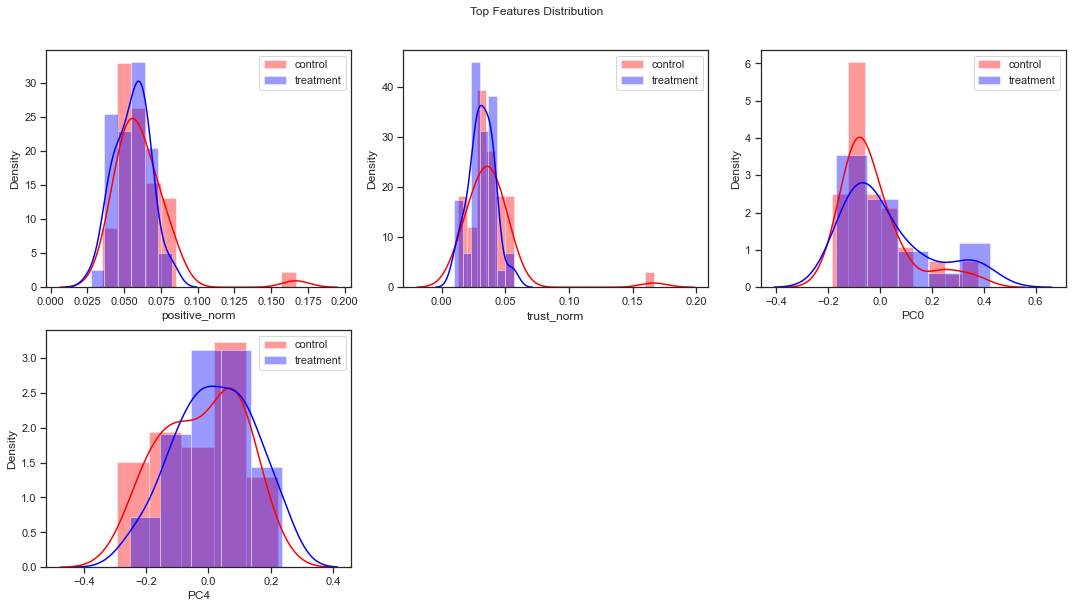

In [46]:
fig = plt.figure(figsize = (15,20))
j = 0
for i in top_feats:
    plt.subplot(5, 3, j+1)
    j += 1
    sns.distplot(df[i][df['mindfulness']==0], color = 'red', label = 'control')
    sns.distplot(df[i][df['mindfulness']==1], color = 'blue', label = 'treatment')
    plt.legend(loc = 'best')
fig.suptitle('Top Features Distribution')
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
plt.show()

In [47]:
X_train = df[df['holdout'] == 0].drop(['mindfulness', 'speaker_id', 'holdout'], axis = 1)
y_train = df[df['holdout'] == 0]['mindfulness']
X_test = df[df['holdout'] == 1].drop(['mindfulness', 'speaker_id', 'holdout'], axis = 1)
y_test = df[df['holdout'] == 1]['mindfulness']

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
models = []

def classification_models(X_train, X_test, y_train, y_test):
    
    models.append(('Logistic Regression', LogisticRegression() ))
    models.append( ('SVM', SVC()) )
    models.append( ('Naive Bayes', GaussianNB()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    
    model_outcomes = []
    model_names = []
    
    for name, model in models:
        results = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
        
        model_outcomes.append(results)
        model_names.append(name)
        
        print(name, results.mean())

In [50]:
classification_models(X_train, X_test, y_train, y_test)

Logistic Regression 0.5914285714285714
SVM 0.6209523809523809
Naive Bayes 0.6504761904761904
KNN 0.5209523809523808


In [51]:
for name, model in models:
    trainedmodel = model.fit(X_train,y_train)
    
    # prediction
    ypredict = trainedmodel.predict(X_test)
    
    acc = accuracy_score(y_test,ypredict)
    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)
    
    print('Model Type: {}'.format(name))
    
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    print('\n************')

Model Type: Logistic Regression
The accuracy: 0.5294117647058824
The Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.11      0.20         9

    accuracy                           0.53        17
   macro avg       0.75      0.56      0.43        17
weighted avg       0.76      0.53      0.42        17

The Confusion Matrix:
 [[8 0]
 [8 1]]

************
Model Type: SVM
The accuracy: 0.4117647058823529
The Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.75      0.55         8
           1       0.33      0.11      0.17         9

    accuracy                           0.41        17
   macro avg       0.38      0.43      0.36        17
weighted avg       0.38      0.41      0.34        17

The Confusion Matrix:
 [[6 2]
 [8 1]]

************
Model Type: Naive Bayes
The accuracy: 0.5882352941176471
The Classificat

In [52]:
corr = data.corr()

In [53]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

In [54]:
columns

array([ True,  True,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False])

In [55]:
selected_columns = data.columns[columns]
selected_columns.shape

(24,)

In [56]:
data2 = data[selected_columns]

In [57]:
feature_list2 = [feat for feat in data2.columns if feat not in ['mindfulness']]

In [58]:
ttest_results2 = pd.DataFrame()

In [59]:
for feat in feature_list2:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = data2[data2['mindfulness']==0]
    df_1 = data2[data2['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results2 = pd.concat([ttest_results2, df_temp], axis=0)

In [60]:
ttest_results2.reset_index(inplace = True, drop = True)

In [61]:
ttest_results2.sort_values('p_value', inplace = True)
ttest_results2.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
1,trust_norm,0.037669,0.031325,1.698532,0.094458
11,PC0,-0.023385,0.028273,-1.604753,0.112557
15,PC4,-0.021429,0.019819,-1.501240,0.136957
19,PC8,0.017754,-0.018365,1.369399,0.174460
2,fear_norm,0.007933,0.009505,-1.096404,0.276148
14,PC3,0.014938,-0.014917,1.062009,0.291223
17,PC6,0.013124,-0.015043,1.037092,0.302600
4,surprise_norm,0.015057,0.011369,0.983983,0.329593
7,y_raw,0.888889,0.790698,0.971028,0.334373
21,cityblock,0.442585,0.433792,0.960031,0.340093
